In [25]:
#Philipp Katterbach 20000510-T472, Markus Pietschner 19990814-T378

In [26]:
# imports necessary packages
from maze import dynamic_programming
from maze import value_iteration
from maze import draw_maze
from maze import Maze
from maze import animate_solution
from maze import visualize_policy
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# defines the maze and starting position
maze = [[0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 1, 1], [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 0, 0, 1, 2, 0, 0]]
start = (0,0,6,5)
maze = np.array(maze)

In [28]:
"""Task 1c)"""
# derives policy, simulates the path for dynamic programming and T=20
env = Maze(maze)
T = 20
V, policy = dynamic_programming(env, T)
path = env.simulate(start, policy, 'DynProg')

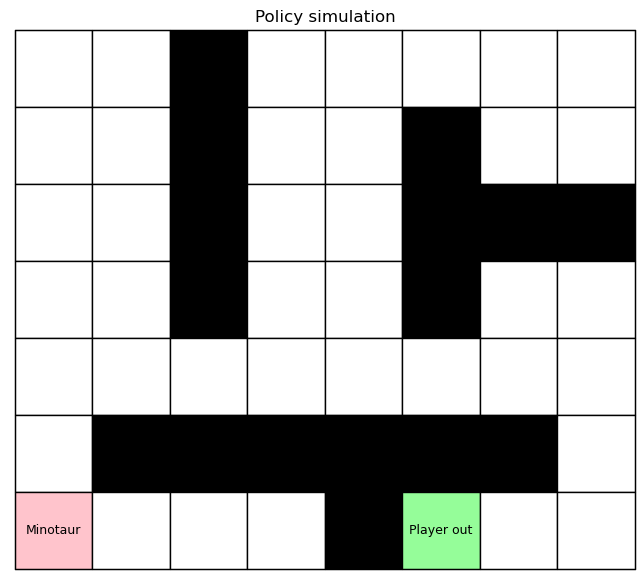

In [29]:
# animate solution
animate_solution(maze, path)

In [30]:
# checks if there are any differences in player movement in 100 different simulations of the game
path_list = []
differences = False
path = env.simulate(start, policy, 'DynProg')
for i in range(100):
    path = env.simulate(start, policy, 'DynProg')
    path_list.append(path)
for i in range(100):
    for j in range(T):
        if path_list[i][j][0] != path[j][0] or path_list[i][j][1] != path[j][1]:
            print("Difference spotted!")
            differences = True
if not differences:
    print("There were no differences between the player movements in 100 different runs")

There were no differences between the player movements in 100 different runs


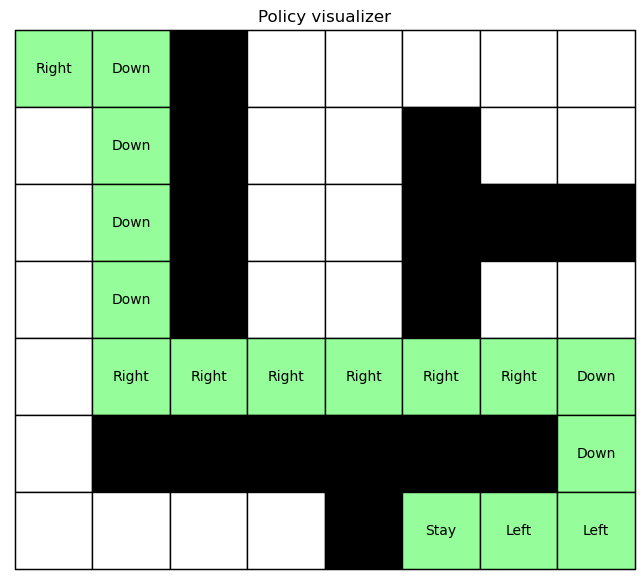

In [31]:
# vizualizes optimal policy 
visualize_policy(maze, path,"c")

# note: the policy is independent of the minotaur movement, therefore we did not include 
# the minotaur in this visualization. When starting at (0,0), we only reach the cells in green for 
# every random minotaur movement.

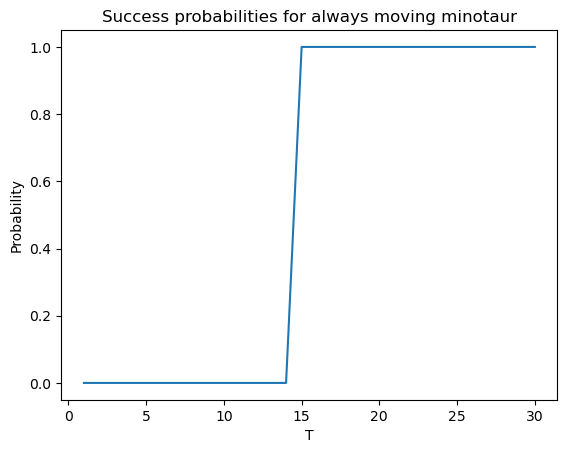

In [32]:
"""Task 1d)"""
# derive exit probability for different values for T=1,...,30
# case: minotaur must move
env = Maze(maze, min_stay=False)
V, policy = dynamic_programming(env, T)

probs = []
runs = 100
for T in range(1,31):
    V, policy = dynamic_programming(env, T)
    count = 0
    for i in range(runs):
        path = env.simulate(start, policy, 'DynProg')
        if (path[-1][0], path[-1][1]) == (6, 5):
            count += 1
    count = count/runs
    probs.append(count)

# visualize probabilites of having a successful run over T
plt.plot(range(1,31), probs)
plt.title("Success probabilities for always moving minotaur")
plt.xlabel("T")
plt.ylabel("Probability")
plt.show()

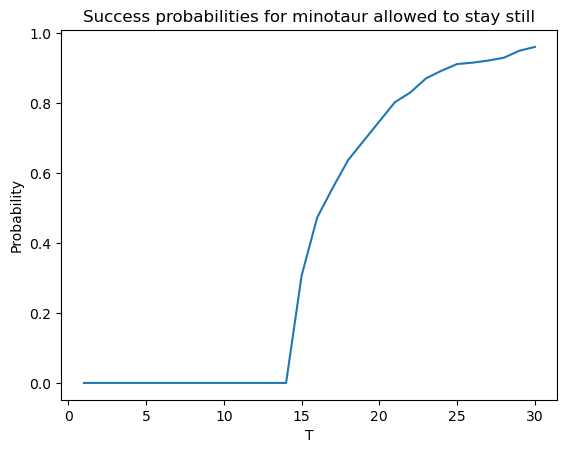

In [33]:
# derive exit probability for different values for T=1,...,30
# case: minotaur can stay
env = Maze(maze, min_stay=True)
V, policy = dynamic_programming(env, T)

probs_stay = []
runs = 1000
for T in range(1,31):
    V, policy = dynamic_programming(env, T)
    count = 0
    for i in range(runs):
        path = env.simulate(start, policy, 'DynProg')
        if (path[-1][0], path[-1][1]) == (6, 5):
            count += 1
    count = count/runs
    probs_stay.append(count)
    
# visualize probabilites of having a successful run over T
plt.plot(range(1,31), probs_stay)
plt.title("Success probabilities for minotaur allowed to stay still")
plt.xlabel("T")
plt.ylabel("Probability")
plt.show()

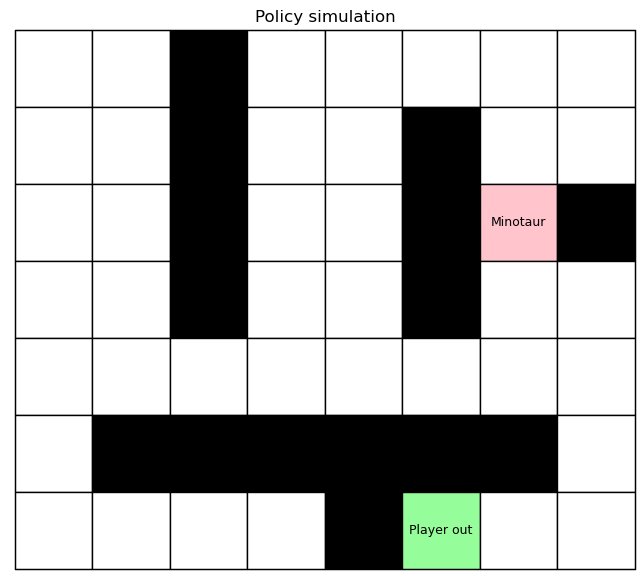

In [34]:
"""Task 1e)"""
# define values for value iteration
gamma = 0.99
epsilon = 0.1

# probability for geometric distribution with mean = 30
p = 1/30

# create environment
env = Maze(maze, poison=True, poison_prob=p)
V, policy = value_iteration(env, gamma, epsilon)

path = env.simulate(start, policy, 'ValIter')
animate_solution(maze, path)

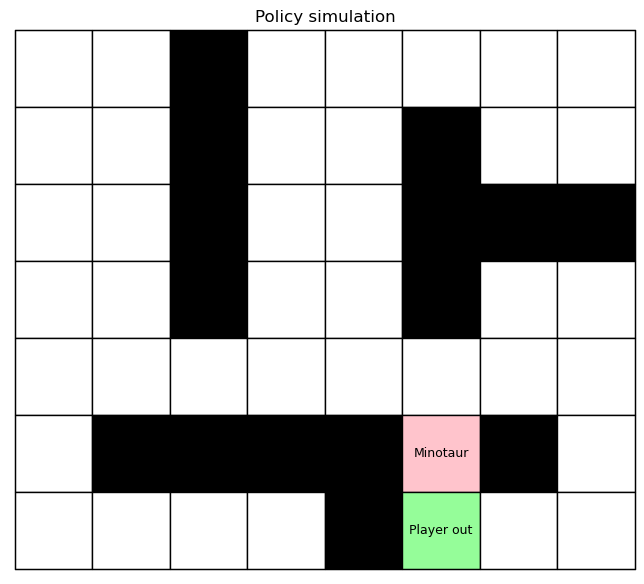

In [35]:
# try out the policy in different scenarios
path = env.simulate(start, policy, 'ValIter')
animate_solution(maze, path)

In [36]:
"""Task 1f)"""
# derives probability to exit the maze over 10.000 trials
count = 0
num = 10000
for i in range(num):
    path = env.simulate(start, policy, 'ValIter')
    if (path[-1][0], path[-1][1]) == (6, 5):
        count += 1
prob = count / num
print("The probability to survive is " + str(prob))

The probability to survive is 0.6102
